In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [2]:
%cd /content/gdrive/MyDrive/Github/ml-blog

/content/gdrive/MyDrive/Github/ml-blog


In [3]:
!pip install xlrd==1.2.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import xlrd

In [5]:
filename = 'default of credit card clients.xls'

In [6]:
DATA = os.path.relpath('/content/gdrive/MyDrive/Github/ml-blog/credit/data/' + filename)

In [7]:
df = pd.read_excel(DATA, 'Data', index_col=[0], header=[1], na_values='NA')
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [8]:
sns.set(style='ticks', color_codes=True)

In [9]:
cols = df.iloc[:, 0:23]

In [10]:
cols

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
2,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
3,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
4,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
5,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,1,3,1,39,0,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29997,150000,1,3,2,43,-1,-1,-1,-1,0,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29998,30000,1,2,2,37,4,3,2,-1,0,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100


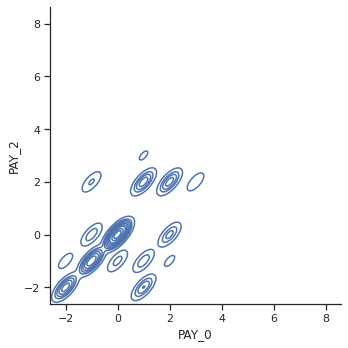

In [11]:
sns.set(style='ticks')
ax = sns.displot(df, x=df.PAY_0, y=df.PAY_2, kind='kde')

In [12]:
bills = df.loc[:, 'BILL_AMT1':'BILL_AMT6']

In [13]:
bills

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
ID,,,,,,
1,3913,3102,689,0,0,0
2,2682,1725,2682,3272,3455,3261
3,29239,14027,13559,14331,14948,15549
4,46990,48233,49291,28314,28959,29547
5,8617,5670,35835,20940,19146,19131
...,...,...,...,...,...,...
29996,188948,192815,208365,88004,31237,15980
29997,1683,1828,3502,8979,5190,0
29998,3565,3356,2758,20878,20582,19357


In [14]:
df.iloc[:, 5:7]

,PAY_0,PAY_2
ID,,
1,2,2
2,-1,2
3,0,0
4,0,0
5,-1,0
...,...,...
29996,0,0
29997,-1,-1
29998,4,3


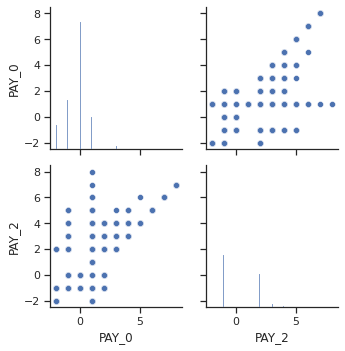

In [15]:
g = sns.PairGrid(df.iloc[:, 5:7])
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)

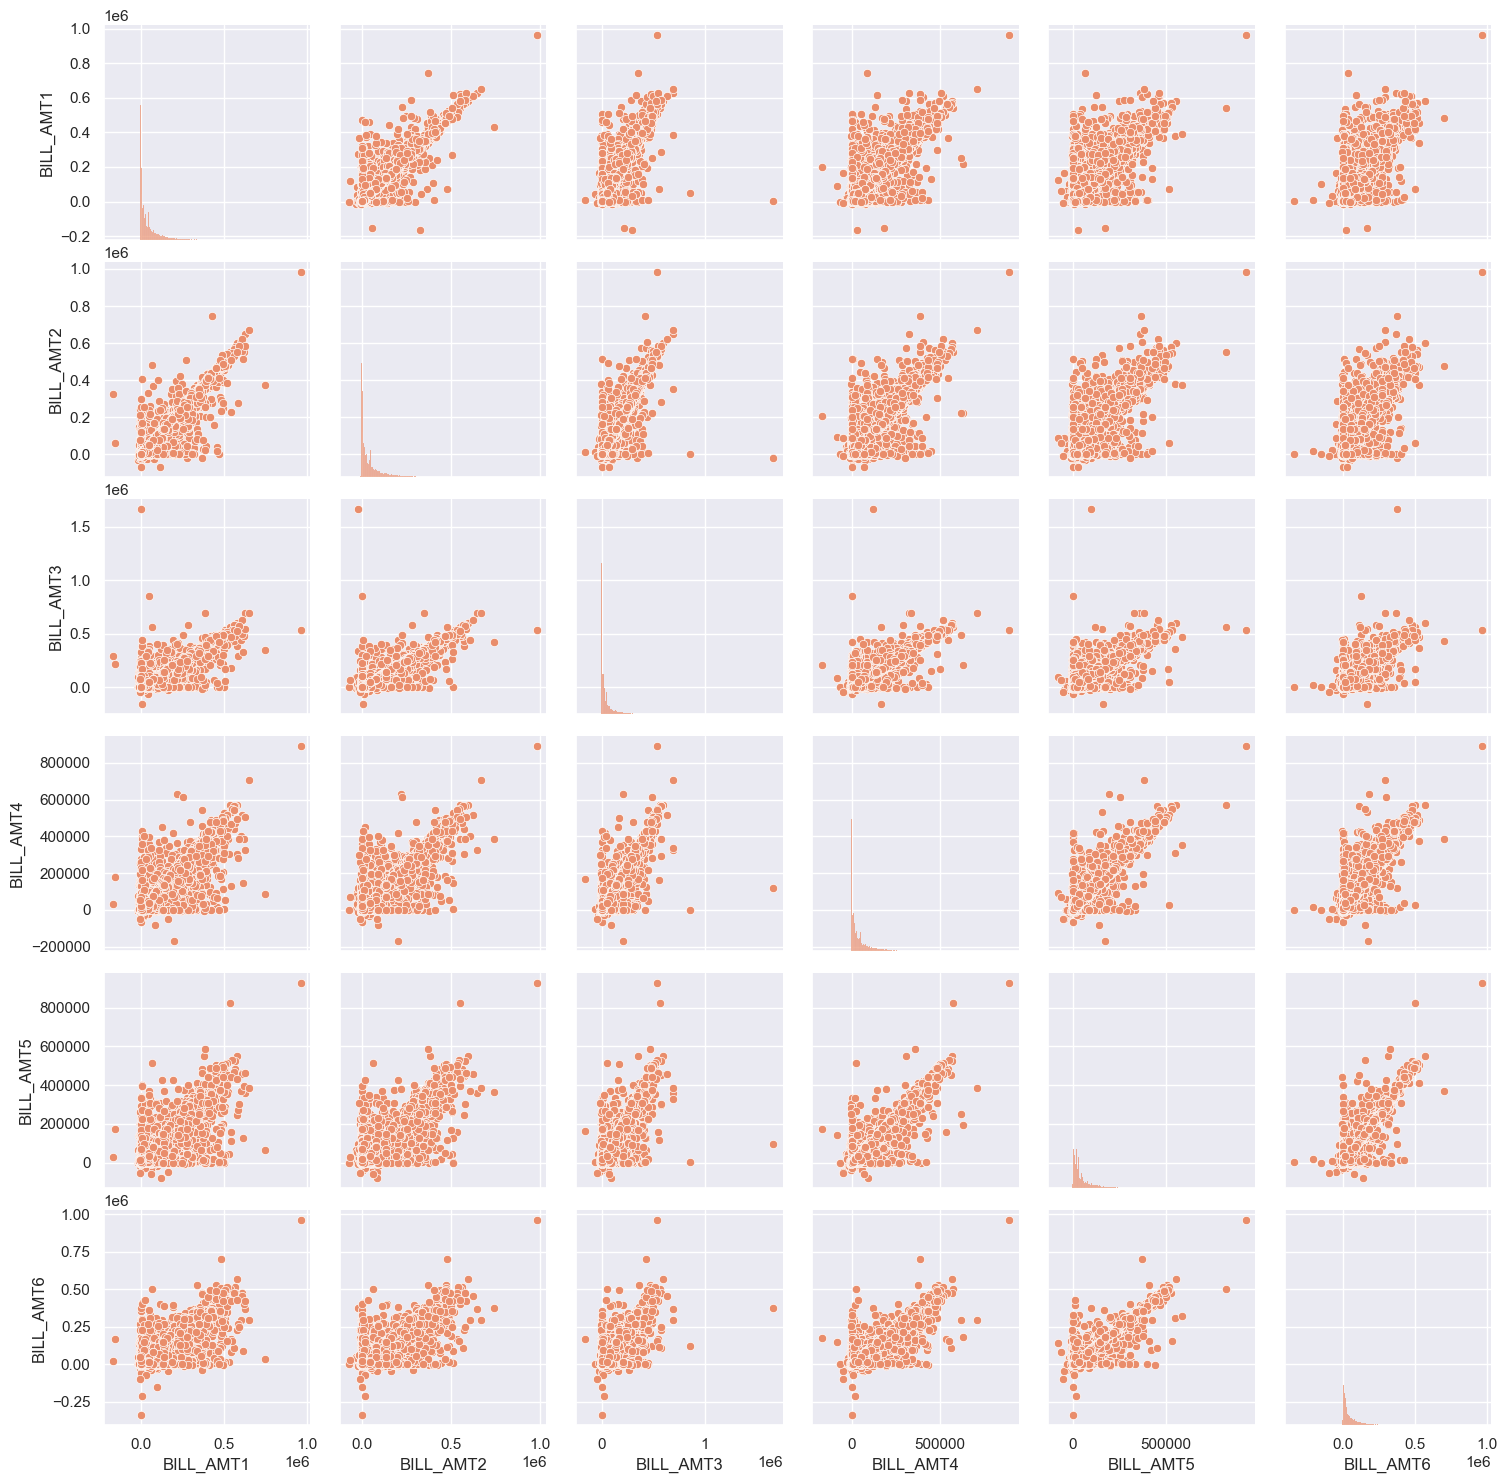

In [ ]:
sns.set_theme(style='darkgrid', palette='flare')
g = sns.PairGrid(bills)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)


In [ ]:
imports = df.iloc[:, 5:7]

In [ ]:
imports.head()

,PAY_0,PAY_2
ID,,
1,2,2
2,-1,2
3,0,0
4,0,0
5,-1,0


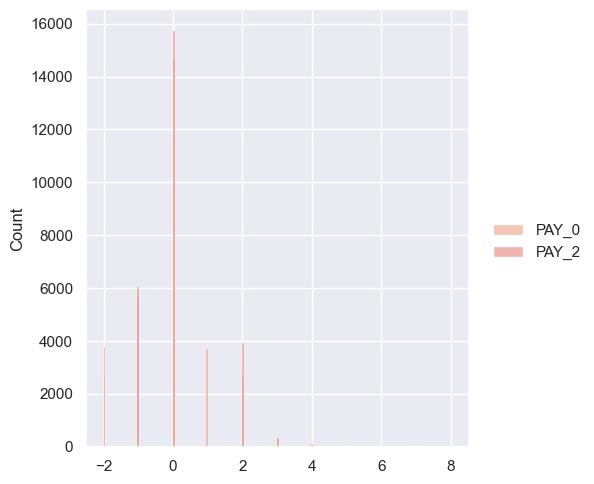

In [ ]:
sns.displot(imports, kind='hist')

<AxesSubplot:xlabel='BILL_AMT1', ylabel='Count'>

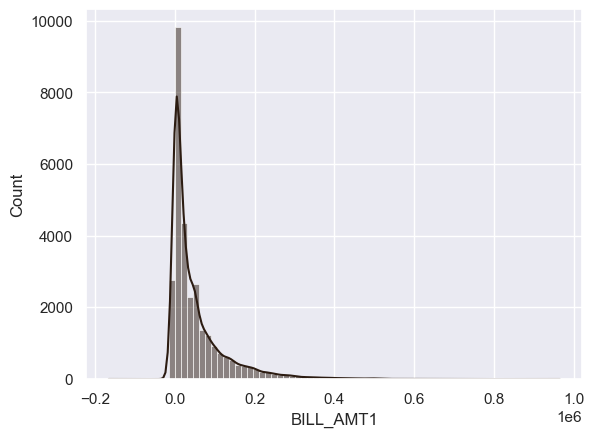

In [ ]:
sns.set_theme(style='darkgrid', palette='copper')
sns.histplot(bills, x='BILL_AMT1', kde=True, bins=75)

* Let's try to normalize this column's data around the mean of 0, with standard deviation of 1; aka, the Normal Distribution.

In [ ]:
arr1 = df.loc[:, 'BILL_AMT1']

norm_1 = np.linalg.norm(arr1)
norm_arr1 = arr1 / norm_1
norm_arr1

ID
1        0.000252
2        0.000173
3        0.001882
4        0.003025
5        0.000555
           ...   
29996    0.012162
29997    0.000108
29998    0.000229
29999   -0.000106
30000    0.003085
Name: BILL_AMT1, Length: 30000, dtype: float64

<AxesSubplot:xlabel='BILL_AMT1', ylabel='Count'>

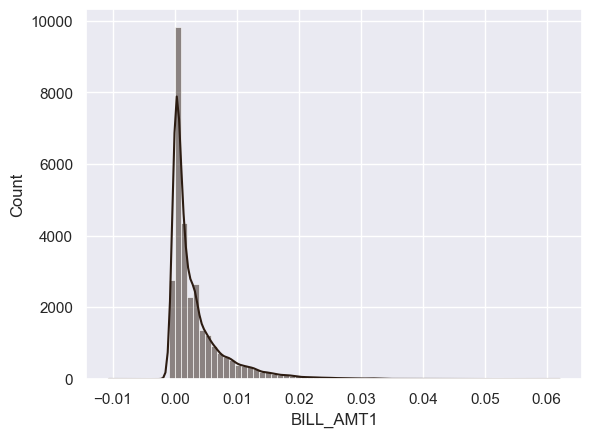

In [ ]:
sns.set_theme(style='darkgrid', palette='copper')
sns.histplot(norm_arr1, kde=True, bins=75)

* Nope, let's try `MinMaxScaler` from `sklearn` instead:

In [ ]:
arr1.values

array([ 3913,  2682, 29239, ...,  3565, -1645, 47929])

<AxesSubplot:ylabel='Count'>

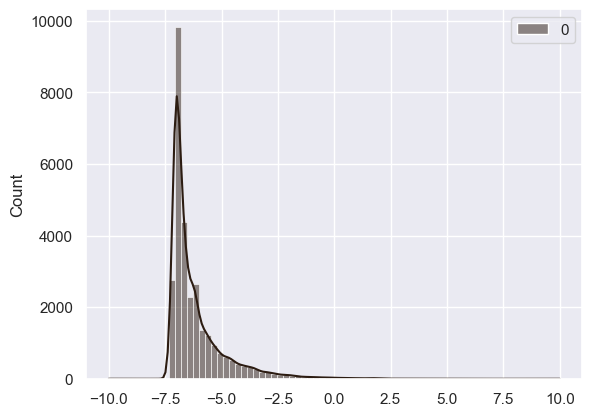

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(-10, 10))


mm_arr1 = mmscaler.fit_transform(arr1.values.reshape(-1,1))

sns.set_theme(style='darkgrid', palette='copper')
sns.histplot(mm_arr1, kde=True, bins=75)


In [ ]:
arr1

,index,ID,BILL_AMT1
0,0,1,3913
1,1,2,2682
2,2,3,29239
3,3,4,46990
4,4,5,8617
...,...,...,...
29995,29995,29996,188948
29996,29996,29997,1683
29997,29997,29998,3565
29998,29998,29999,-1645


In [16]:
df.columns

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

In [23]:
df['default payment next month'].value_counts()

0    23364
1     6636
Name: default payment next month, dtype: int64

In [26]:
plt.style.use('ggplot')

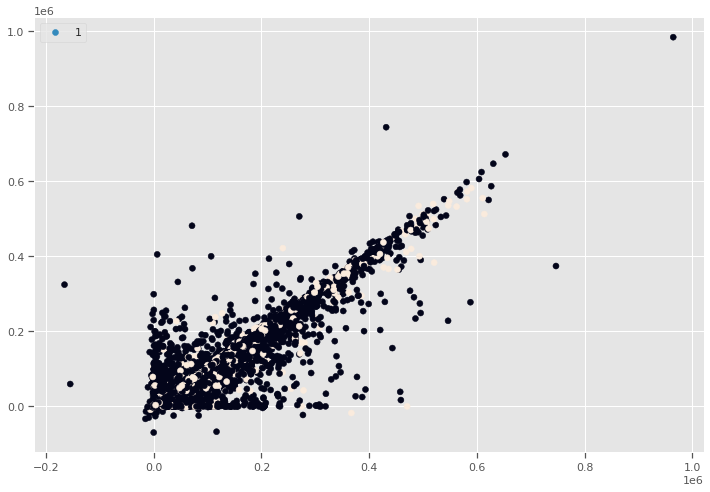

In [27]:
plt.figure(figsize=(12,8))
# plt.style.use('ggplot')
plt.scatter(df.loc[:, 'BILL_AMT1'], df.loc[:, 'BILL_AMT2'], c=df['default payment next month'])
plt.legend(df['default payment next month'])
plt.show()

In [30]:
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git checkout -- <file>..." to discard changes in working directory)

	modified:   credit/EDA/taiwan-credit-norm.ipynb

no changes added to commit (use "git add" and/or "git commit -a")
